In [1]:
import scanpy as sc, matplotlib.pyplot as plt, seaborn as sns, numpy as np

In [2]:
adata = sc.read_h5ad("bipolar_raw.h5ad")

In [3]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
adata = adata[:, adata.var.highly_variable]
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/home/mr_wick/miniconda3/envs/omics_python/lib/python3.13/site-packages/scanpy/preprocessing/_pca/__init__.py:379: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


In [5]:
adata

AnnData object with n_obs × n_vars = 147523 × 962
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN', 'sampleid', 'age', 'gender', 'reference', 'accession', 'sample_note', 'subclass_label', 'author_cell_type', 'development_stage_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_type', 'library_platform', 'cell_type_ontology_term_id', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title', 'log1p', 'hvg', 'pca', 'neighb

In [6]:
root_choice = np.random.choice(adata.obs_names[adata.obs['age'] == "P14"])

In [8]:
adata.uns["iroot"] = adata.obs_names.get_loc(root_choice)

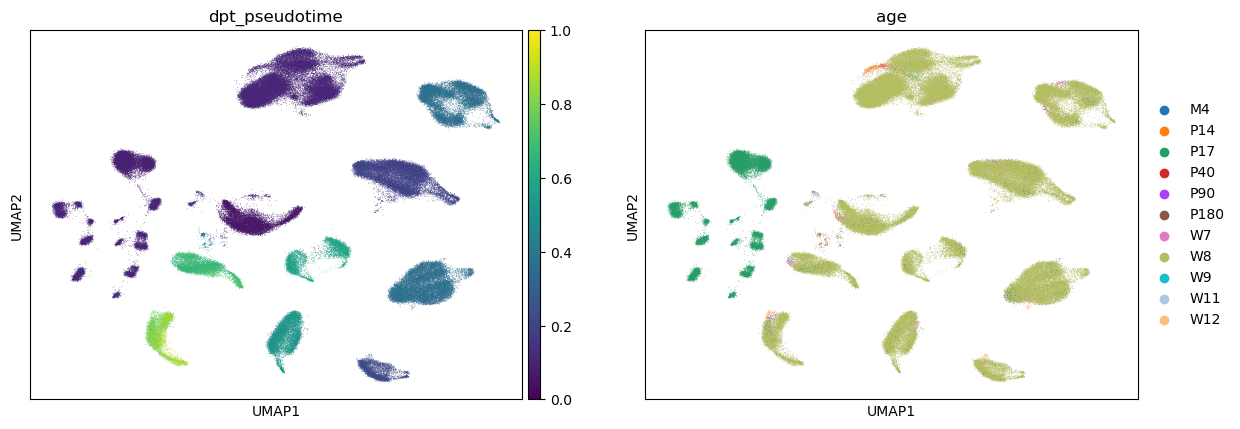

In [9]:
sc.tl.dpt(adata)
sc.pl.umap(adata, color=['dpt_pseudotime','age'])

### Zoom in rod bipolar cell types and try

In [3]:
adata_rod = adata[(adata.obs["cell_type"] == "rod bipolar cell") & 
            (adata.obs["age"] != "W8") & (adata.obs["age"] != "P17")].copy()

In [4]:
sc.pp.normalize_total(adata_rod)
sc.pp.log1p(adata_rod)
sc.pp.highly_variable_genes(adata_rod)
adata_rod = adata_rod[:, adata_rod.var.highly_variable]
sc.pp.pca(adata_rod)
sc.pp.neighbors(adata_rod)
sc.tl.umap(adata_rod)

/home/mr_wick/miniconda3/envs/omics_python/lib/python3.13/site-packages/scanpy/preprocessing/_pca/__init__.py:379: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


In [5]:
root_choice = np.random.choice(adata_rod.obs_names[adata_rod.obs['age'] == "P14"])
adata_rod.uns["iroot"] = adata_rod.obs_names.get_loc(root_choice)

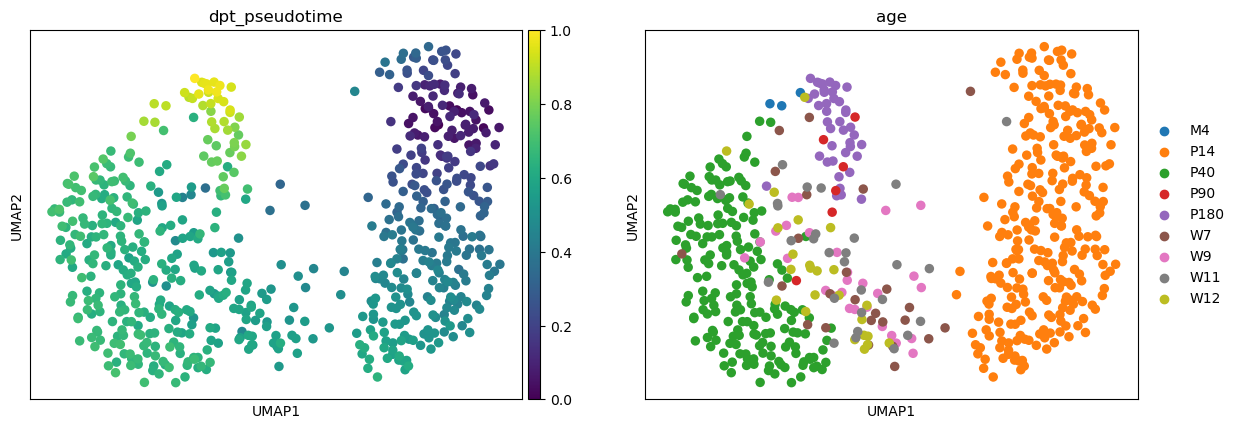

In [6]:
sc.tl.dpt(adata_rod)
sc.pl.umap(adata_rod, color=['dpt_pseudotime','age'])